# Overview

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

plt.style.use('seaborn-white')

In [2]:
df = pd.read_csv('./ba_lands_2014-2018.csv')

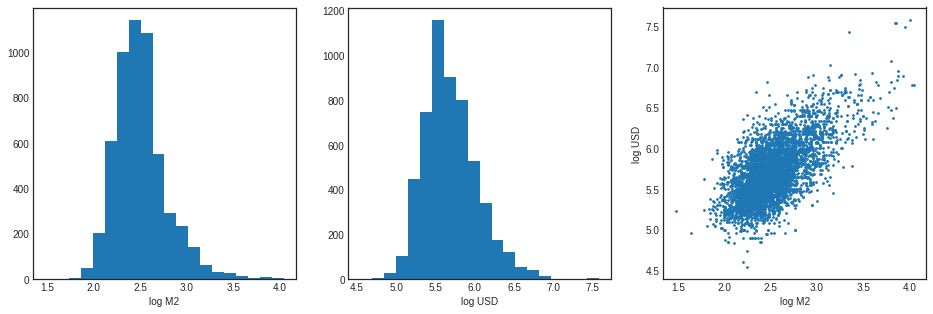

In [3]:
fig, (ax1, ax2, ax3) = plt.subplots(nrows=1, ncols=3, figsize=(16,5))

x, y = np.log10(df['M2']), np.log10(df['USD'])

ax1.hist(x, bins=20)
ax1.set_xlabel('log M2')

ax2.hist(y, bins=20)
ax2.set_xlabel('log USD')

ax3.scatter(x, y, s=3)
ax3.set_xlabel('log M2')
ax3.set_ylabel('log USD')

plt.show()

# Choroplet map

In [4]:
import folium

In [5]:
df['USD_PER_M2'] = df['USD'].divide(df['M2'])
mean_by_neighborhood = df.groupby('NEIGHBORHOOD').mean()[['USD_PER_M2']]
mean_by_neighborhood.columns = ['NEIGHBORHOOD_MEAN_M2']

mean_by_neighborhood.reset_index(inplace=True)
mean_by_neighborhood.sort_values(by='NEIGHBORHOOD_MEAN_M2', ascending=False, inplace=True)
mean_by_neighborhood.reset_index(drop=True, inplace=True)

In [6]:
# Top 10 most expensive neighborhoods
mean_by_neighborhood.head(10)

,NEIGHBORHOOD,NEIGHBORHOOD_MEAN_M2
0,RETIRO,5505.691617
1,SAN NICOLAS,4712.395382
2,RECOLETA,4353.735366
3,PALERMO,3793.938114
4,BELGRANO,3749.358222
5,PUERTO MADERO,3600.000000
6,COLEGIALES,2834.712687
7,NUÑEZ,2734.779667
8,VILLA CRESPO,2382.868127
9,CABALLITO,2173.105057


In [7]:
# Top 10 most expensive neighborhoods
mean_by_neighborhood.tail(10)

,NEIGHBORHOOD,NEIGHBORHOOD_MEAN_M2
38,PARQUE AVELLANEDA,1239.325876
39,BARRACAS,1205.904305
40,VILLA LURO,1190.257844
41,LINIERS,1179.451717
42,VERSALLES,1051.564897
43,MATADEROS,965.649028
44,BOCA,859.473209
45,VILLA LUGANO,810.822234
46,VILLA SOLDATI,584.397113
47,VILLA RIACHUELO,572.584950


In [8]:
map_ba = folium.Map(location=[-34.603722, -58.381592], zoom_start=12)

map_ba.choropleth(geo_data='./barrios.geojson', 
             key_on = 'feature.properties.barrio', 
             data = mean_by_neighborhood, 
             columns = ['NEIGHBORHOOD', 'NEIGHBORHOOD_MEAN_M2'],
             fill_color = 'YlGn',
             fill_opacity = 0.7,
             line_opacity = 0.7,
             legend_name = 'Price per square meter in USD'
            )

/home/epassaro/miniconda3/envs/carsus/lib/python3.6/site-packages/folium/folium.py:415: FutureWarning: The choropleth  method has been deprecated. Instead use the new Choropleth class, which has the same arguments. See the example notebook 'GeoJSON_and_choropleth' for how to do this.
  FutureWarning


In [9]:
map_ba